<h1 align="center"><font color="yellow">DeepLearning.AI: Keyword Search</font></h1>

<font color="yellow">Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro</font>

Links de estudo:

* [Weaviate](https://weaviate.io/developers/weaviate/tutorials/connect)

* [Eddy -->  Weaviate](https://console.weaviate.cloud/dashboard#)

* [GitHub: weaviate/recipes](https://github.com/weaviate/recipes/blob/main/multi-tenancy/multi-tenancy-example.ipynb)

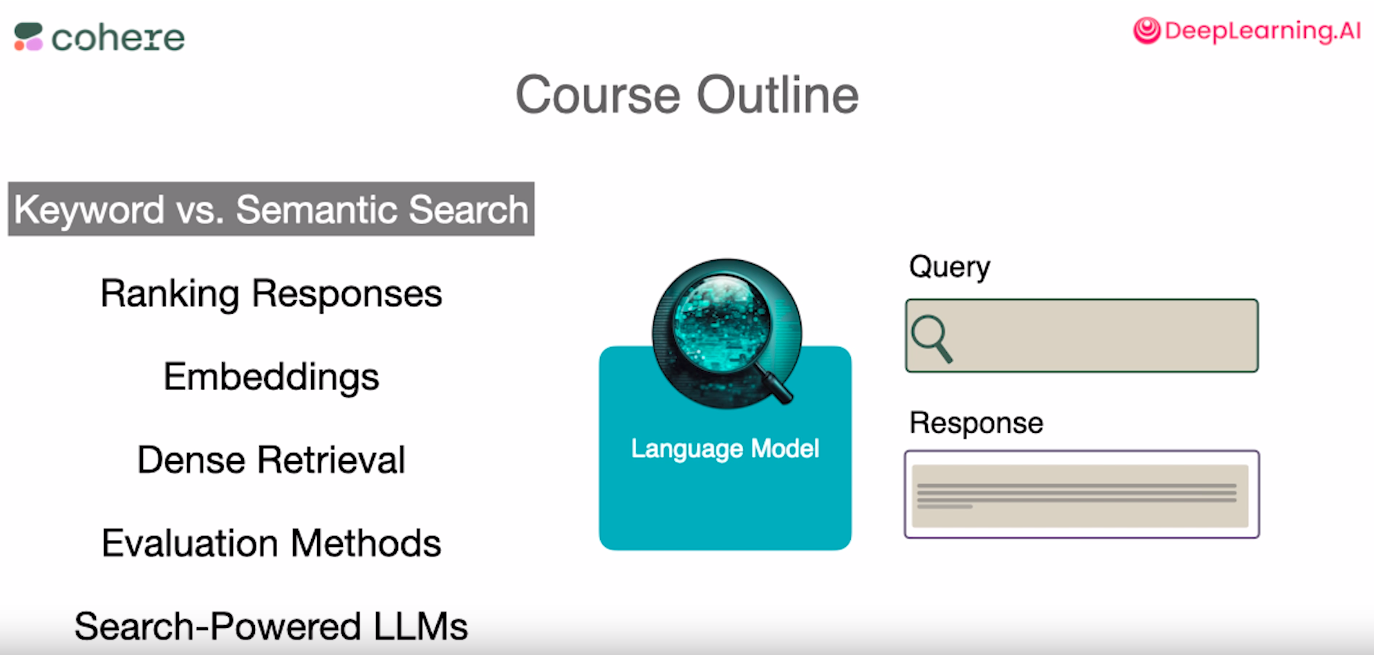

# <font color="red">Setup</font>

In [ ]:
# %pip install cohere
# %pip install weaviate-client

In [1]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

Vamos começar importando o `Weaviate` para acessar o banco de dados da Wikipédia.

In [2]:
Eddy_COHERE_API_KEY = os.environ["COHERE_API_KEY"]
Eddy_WEAVIATE_API_KEY = os.environ["WEAVIATE_API_KEY"]

Eddy_HUGGINGFACEHUB_API_KEY = os.environ["HUGGINGFACEHUB_API_KEY"]
Eddy_OPENAI_API_KEY = os.environ["OPENAI_API_KEY"]


In [3]:
import weaviate

# Instantiate the client with the auth config
client = weaviate.Client(
    url="https://eddy1-weaviate-x0twid9o.weaviate.network",  # Replace w/ your endpoint
    auth_client_secret=weaviate.AuthApiKey(api_key=Eddy_WEAVIATE_API_KEY),  # Replace w/ your Weaviate instance API key
    additional_headers={
        "X-Cohere-Api-Key": Eddy_COHERE_API_KEY,
        #"X-HuggingFace-Api-Key": Eddy_HUGGINGFACEHUB_API_KEY,
        #"X-OpenAI-Api-Key": Eddy_OPENAI_API_KEY,
    },
)

In [4]:
client.is_ready() 

True

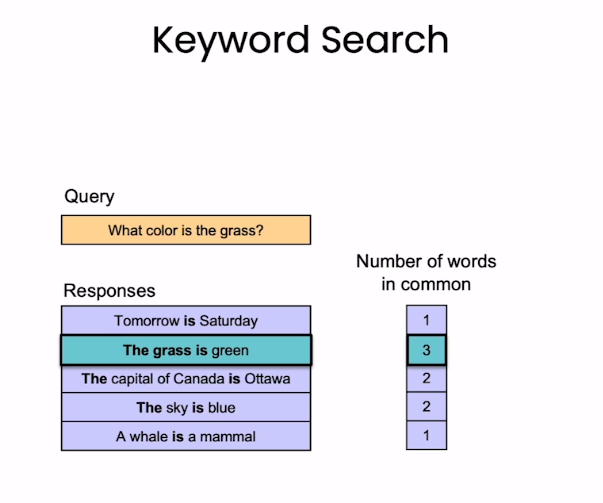

In [5]:
def keyword_search(query,
                   results_lang='en',
                   properties = ["title","url","text"],
                   num_results=3):

    where_filter = {
    "path": ["lang"],
    "operator": "Equal",
    "valueString": results_lang
    }
    
    response = (
        client.query.get("Articles", properties)
        .with_bm25(
            query=query
        )
        .with_where(where_filter)
        .with_limit(num_results)
        .do()
        )

    result = response['data']['Get']['Articles']
    return result

In [6]:
query = "What is the most viewed televised event?" #"Qual é o evento televisionado mais visto?"

keyword_search_results = keyword_search(query)
print(keyword_search_results)

UnexpectedStatusCodeException: Query was not successful! Unexpected status code: 422, with response body: {'error': [{'message': 'no graphql provider present, this is most likely because no schema is present. Import a schema first!'}]}.